# Web Mining and Applied NLP (44-620)

## Module 6: Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Justin Schroder 
### Date: July 28, 2025 
### Class: Web Mining (MOD6)  
### GitHub: [https://github.com/SchroderJ-pixel]

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

---

### Step 0: Imports

In [94]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list
print('Everything imported successfully — ready to go!')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.7.14
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.2.1
cloudpathlib              0.21.1
colorama                  0.4.6
comm                      0.2.3
confection                0.1.5
contourpy                 1.3.3
cycler                    0.12.1
cymem                     2.0.11
debugpy                   1.8.15
decorator                 5.2.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing     

---

### Step 1:

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [95]:
# Set the URL
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Make HTTP request
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the article content
article_element = soup.find("article")
if article_element is None:
    raise Exception("Could not find the <article> tag.")

# Save the HTML string to a .pkl file
with open("laser_headlights_article.pkl", "wb") as file:
    pickle.dump(str(article_element), file)

print("Article HTML string saved successfully to 'laser_headlights_article.pkl'")



Article HTML string saved successfully to 'laser_headlights_article.pkl'


---

### Step 2:

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [96]:
# load the article HTML string from the .pkl file that was just created
with open("laser_headlights_article.pkl", "rb") as file:
    article_html =pickle.load(file)

# Parse the HTML string using BeautifulSoup
article_soup = BeautifulSoup(article_html, 'html.parser')

# Print just the text of the article
print(article_soup.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

---

### Step 3:

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [97]:
# Load the article HTML string
with open("laser_headlights_article.pkl", "rb") as file:
    article_html = pickle.load(file)

# Parse with BeautifulSoup and extract text
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()

# Load spaCy 
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(text)

# Filter tokens
filtered_tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count frequency of filtered tokens
token_counts = Counter(filtered_tokens)

# Get the 5 most common tokens
most_common = token_counts.most_common(5)

# Print 
print("Top 5 Most Frequent Tokens (Excluding Stopwords, Punctuation, Whitespace):")
for token, freq in most_common:
    print(f"Token: '{token}' — Frequency: {freq}")


Top 5 Most Frequent Tokens (Excluding Stopwords, Punctuation, Whitespace):
Token: 'laser' — Frequency: 35
Token: 'headlights' — Frequency: 19
Token: 'headlight' — Frequency: 11
Token: 'technology' — Frequency: 10
Token: 'led' — Frequency: 10


---

### Step 4:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [98]:
# Load HTML string
with open("laser_headlights_article.pkl", "rb") as file:
    article_html = pickle.load(file)

# Parse with BeautifulSoup and extract 
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()

# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Process the text
doc = nlp(text)

# Filter and collect lemmas (lowercase, not stop words, not punctuation/space)
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count lemma frequency
lemma_counts = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Print
print("Top 5 Most Frequent Lemmas (Excluding Stopwords, Punctuation, Whitespace):")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}' — Frequency: {freq}")

Top 5 Most Frequent Lemmas (Excluding Stopwords, Punctuation, Whitespace):
Lemma: 'laser' — Frequency: 40
Lemma: 'headlight' — Frequency: 28
Lemma: 'beam' — Frequency: 12
Lemma: 'technology' — Frequency: 10
Lemma: 'led' — Frequency: 10


---

### Step 5:

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [99]:
# load spaCy
nlp = spacy.load("en_core_web_sm")

# score based on how many interesting tokens are in the sentence
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    if not words:
        return 0
    matches = sum(1 for word in words if word in interesting_tokens)
    return matches / len(words)

# score based on how many interesting lemmas are in the sentence
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    if not lemmas:
        return 0
    matches = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return matches / len(lemmas)

# open the article we saved earlier
with open("laser_headlights_article.pkl", "rb") as file:
    article_html = pickle.load(file)

# pull the text from the HTML
soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()

# run spaCy on the full article
doc = nlp(text)

# grab the first sentence of the article
sentences = list(doc.sents)
for i, s in enumerate(sentences[:10]):
    print(f"[{i}] {s.text.strip()}")

# then select the best sentence
first_sentence = sentences[4].text

# get the top 5 tokens (from earlier or recalculate here)
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
token_counts = Counter(tokens)
most_common_tokens = token_counts.most_common(5)

# get the top 5 lemmas
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
lemma_counts = Counter(lemmas)
most_common_lemmas = lemma_counts.most_common(5)

# just want the token/lemma words, not the counts
interesting_tokens = [token for token, _ in most_common_tokens]
interesting_lemmas = [lemma for lemma, _ in most_common_lemmas]

# score the first sentence using both methods
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

print(f"\nToken-based score: {token_score:.3f}")
print(f"Lemma-based score: {lemma_score:.3f}")


[0] How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
[1] Engines, fuel efficiency, and the switch to electric power are all more front of mind.
[2] However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
[3] Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
[4] Now, a new technology is on the scene, with lasers!
[5] Laser Headlights?!
[6] BWM’s prototype laser headlight assemblies undergoing testing.
[7] The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile.
[8] Obviously, coherent beams of monochromatic light would mak

---

### Step 6:

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

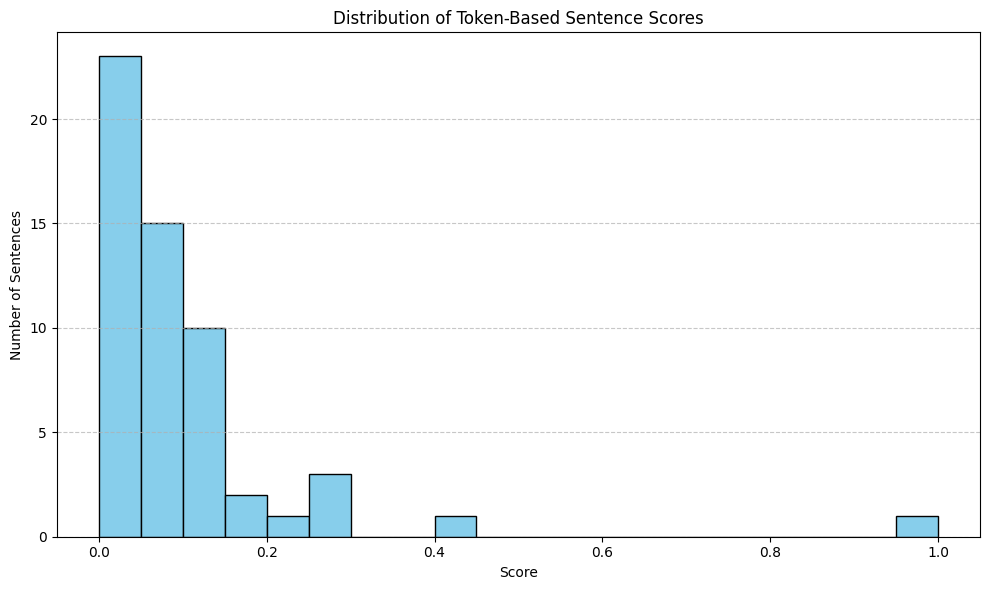

In [100]:
# get all sentences from the article
sentences = list(doc.sents)

# score each sentence using tokens
token_scores = [
    score_sentence_by_token(sent.text, interesting_tokens)
    for sent in sentences
]

# plot a histogram of the token scores
plt.figure(figsize=(10, 6))
plt.hist(token_scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Token-Based Sentence Scores")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

--- 

### Step 7:

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

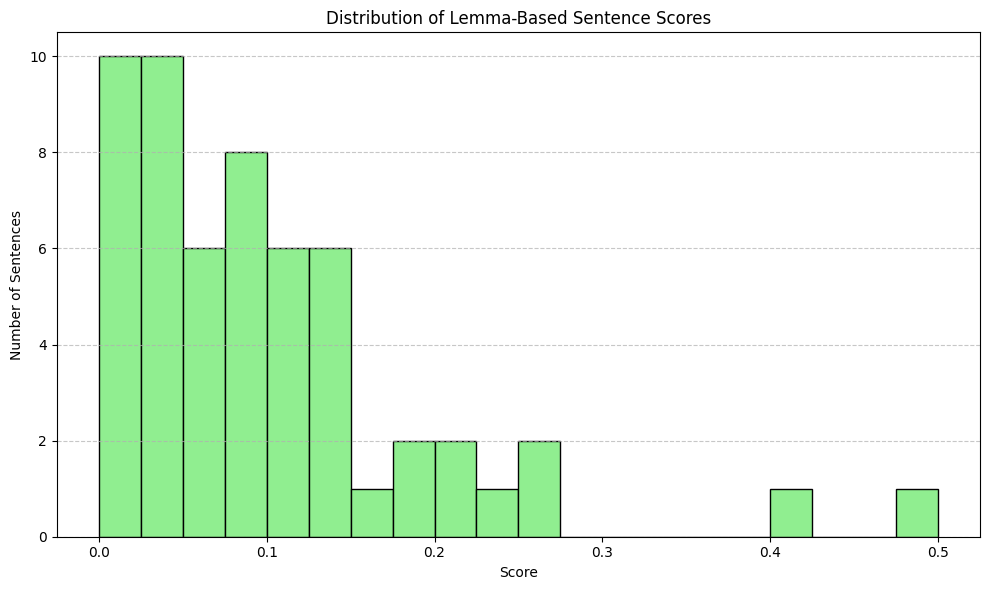

In [101]:
# score each sentence using lemmas
lemma_scores = [
    score_sentence_by_lemma(sent.text, interesting_lemmas)
    for sent in sentences
]

# plot a histogram of the lemma scores
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribution of Lemma-Based Sentence Scores")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---

### Step 8:

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

If we only wanted to count nouns, words like "use" or "power" might get left out since they’re often verbs, depending on the context. The lists from Questions 3 and 4 would be shorter and more focused on things (like “laser” or “headlight”) instead of actions or descriptions.

To do that in the code, I’d add a check for part of speech and only keep tokens where token.pos_ == "NOUN". If I wanted to include proper nouns too (like “BMW”), I could check for both "NOUN" and "PROPN".

Here are two ways it could be coded:

*Just Nouns:*

tokens = [token.text.lower() for token in doc if token.pos_ == "NOUN" and not token.is_stop and not token.is_punct and not token.is_space]

*Nouns + Proper Nouns:*

tokens = [token.text.lower() for token in doc if token.pos_ in ("NOUN", "PROPN") and not token.is_stop and not token.is_punct and not token.is_space]